In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import scipy.interpolate as spi
%matplotlib inline  
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [10, 6]
c = 3e8
import sys
np.set_printoptions(threshold=sys.maxsize)
import scipy.interpolate as interp

In [2]:
%matplotlib inline
import tensorflow as tf
import torch
import cupy as cp
import numpy as np
import matplotlib.pyplot as plt
# Print numpy see whether mkl/blas is available
np.show_config()

blas_mkl_info:
  NOT AVAILABLE
blis_info:
  NOT AVAILABLE
openblas_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
blas_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
lapack_mkl_info:
  NOT AVAILABLE
openblas_lapack_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
lapack_opt_info:
    libraries = ['openblas', 'openblas']
    library_dirs = ['/usr/local/lib']
    language = c
    define_macros = [('HAVE_CBLAS', None)]
    runtime_library_dirs = ['/usr/local/lib']
Supported SIMD extensions in this NumPy install:
    baseline = SSE,SSE2,SSE3
    found = SSSE3,SSE4

In [ ]:
# Helper functions for each package
def tf_ifft2_fft2(data):
    data2 = tf.signal.fft2d(data)
    return tf.signal.ifft2d(data2)

def torch_ifft2_fft2(data):
    signal_ndim = 2
    data2 = torch.fft.fft(data)#, signal_ndim=signal_ndim)
    return torch.fft.ifft(data2)#, signal_ndim=signal_ndim)

def np_ifft2_fft2(data):
    data2 = np.fft.fft2(data)
    return np.fft.ifft2(data2)

def cp_ifft2_fft2(data):
    data2 = cp.fft.fft2(data)
    return cp.fft.ifft2(data2)


In [ ]:
sizes = [512, 1024, 2048, 4096] # X * X pixel arrays/tensors
names = []
totaltimes = []
tfdevice = 1
torchdevice = 3
cpdevice = 2
name = 'TensorFlow\nCPU'
names.append(name)
with tf.device("/device:CPU:0"):
    tensortimes = []
    datas = [tf.dtypes.cast(tf.random.normal(shape=(x,x)), dtype = tf.complex128) for x in sizes]
    print(f'Working on device: {datas[0].device}')
    for x, data in zip(sizes, datas):
        print('{} {}x{}'.format(" ".join(name.split('\n')), x, x))
        t = %timeit -o tf_ifft2_fft2(data)
        tensortimes.append(t)
    totaltimes.append(tensortimes)

Working on device: /job:localhost/replica:0/task:0/device:CPU:0
TensorFlow CPU 512x512
54.8 ms ± 22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
TensorFlow CPU 1024x1024
260 ms ± 133 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
TensorFlow CPU 2048x2048
865 ms ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
TensorFlow CPU 4096x4096
5.87 s ± 475 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
name = 'TensorFlow\nGPU'
names.append(name)
print('{} available: {}'.format(name, tf.test.is_gpu_available()))
with tf.device("/device:GPU:{}".format(tfdevice)):
    tensortimes = []
    datas = [tf.dtypes.cast(tf.random.normal(shape=(x,x)), dtype = tf.complex128) for x in sizes]
    print(f'Working on device: {datas[0].device}')
    for x, data in zip(sizes, datas):
        print('{} {}x{}'.format(" ".join(name.split('\n')), x, x))
        t = %timeit -o tf_ifft2_fft2(data)
        tensortimes.append(t)
    totaltimes.append(tensortimes)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


TensorFlow
GPU available: True
Working on device: /job:localhost/replica:0/task:0/device:GPU:0
TensorFlow GPU 512x512
448 µs ± 88.8 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
TensorFlow GPU 1024x1024
2.06 ms ± 6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
TensorFlow GPU 2048x2048
7.24 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
TensorFlow GPU 4096x4096
34.2 ms ± 3.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
sizes = [512, 1024, 2048, 4096] # X * X pixel arrays/tensors
names = []
totaltimes = []
tfdevice = 1
torchdevice = 3
cpdevice = 2
name = 'PyTorch\nCPU'
device_type = 'cpu'
device = torch.device(device_type)
names.append(name)
torchtimes = []
datas = [torch.randn((x,x,2), device=device) for x in sizes]
print(f'Working on device: {datas[0].device}')
for x, data in zip(sizes, datas):
    print('{} {}x{}'.format(" ".join(name.split('\n')), x, x))
    t = %timeit -o torch_ifft2_fft2(data)
    torchtimes.append(t)
totaltimes.append(torchtimes)

Working on device: cpu
PyTorch CPU 512x512
4.08 ms ± 115 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
PyTorch CPU 1024x1024
16.6 ms ± 201 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
PyTorch CPU 2048x2048
68.5 ms ± 781 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
PyTorch CPU 4096x4096
249 ms ± 4.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
name = 'Numpy\nCPU'
names.append(name)
nptimes = []
datas = [np.random.normal(size=(x,x)).astype('complex128') for x in sizes]
for x, data in zip(sizes, datas):
    print('{} {}x{}'.format(" ".join(name.split('\n')), x, x))
    t = %timeit -o np_ifft2_fft2(data)
    nptimes.append(t)
totaltimes.append(nptimes)

Numpy CPU 512x512
16.1 ms ± 6.73 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
Numpy CPU 1024x1024
61.9 ms ± 900 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Numpy CPU 2048x2048
476 ms ± 3.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Numpy CPU 4096x4096
2.49 s ± 135 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
%run Fraunhofer.py

In [7]:
# Torch
size=1024
torchdevice = 3
name = 'PyTorch\nCPU'
device_type = 'cpu'
device = torch.device(device_type)
data = torch.randn((size,size), device=device)
print(f'Working on device: {data.device}')
#t = %timeit -o torch_ifft2_fft2(data)
t = %timeit -o aper_init_torch(100., 0.1,0.1,4096,4096,shape=0,r=0.7)

Working on device: cpu
442 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
# Numpy
name = 'Numpy\nCPU'
#data = np.random.normal(size=(size,size)).astype('complex128')
t = %timeit -o amp = aper_init_np(100., 0.1,0.1,4096,4096,shape=0,r=0.7)

896 ms ± 4.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
def aper_init_np(amp, pixsize_x, pixsize_y, pixn_x, pixn_y, shape=0, r=2, a=.5, b=8, d=2, sigma=2):
    """
    pixsize: physical size of each pixel
    pixn: number of pixels in each dimension
    shape: shape of the E field
    amp = amplitude
    r = radius
    a = width of a slit
    b = height of a slit
    d = separation between two slits
    sigma = width of a gaussian
    """
    aper_plane = np.ones(shape=(pixn_x,pixn_y))*0
    #form physical dimension of x and y
    x = np.linspace(0,pixsize_x*(pixn_x-1), pixn_x)
    y = np.linspace(0,pixsize_y*(pixn_y-1), pixn_y)
    x,y = x-x.max()/2, y-y.max()/2 #place the origin at the center of the aperture plane
    
    if shape==0: #circle
        E_idx = (x[np.newaxis,:])**2 + (y[:,np.newaxis])**2 < r**2
        aper_plane[E_idx] = amp
    if shape==1: #single slit
        E_idx = ((x[np.newaxis,:]>0)&(x[np.newaxis,:]<a)) & ((y[:,np.newaxis]>(-b/2))&(y[:,np.newaxis]<(b/2)))
        aper_plane[E_idx] = amp
    if shape==2: #double slit
        E_idx1 = ((x[np.newaxis,:]>(-d/2-a/2))&(x[np.newaxis,:]<(-d/2+a/2))) & ((y[:,np.newaxis]>(-b/2))&(y[:,np.newaxis]<(b/2)))
        E_idx2 = ((x[np.newaxis,:]>(d/2-a/2))&(x[np.newaxis,:]<(d/2+a/2))) & ((y[:,np.newaxis]>(-b/2))&(y[:,np.newaxis]<(b/2)))
        aper_plane[E_idx1|E_idx2] = amp
    if shape==3: # gaussian
        xx,yy = np.meshgrid(x, y)
        aper_plane = np.exp(-(xx**2+yy**2)/(2*sigma**2))
    
    data = np.abs(np.fft.fftshift(np.fft.fft2(aper_plane)))
    return x,y,aper_plane



In [6]:
def aper_init_torch(amp, pixsize_x, pixsize_y, pixn_x, pixn_y, shape=0, r=2, a=.5, b=8, d=2, sigma=2):
    """
    pixsize: physical size of each pixel
    pixn: number of pixels in each dimension
    shape: shape of the E field
    amp = amplitude
    r = radius
    a = width of a slit
    b = height of a slit
    d = separation between two slits
    sigma = width of a gaussian
    """
    aper_plane = torch.ones(pixn_x,pixn_y)*0
    #form physical dimension of x and y
    x = torch.linspace(0,pixsize_x*(pixn_x-1), pixn_x)
    y = torch.linspace(0,pixsize_y*(pixn_y-1), pixn_y)
    x,y = x-x.max()/2, y-y.max()/2 #place the origin at the center of the aperture plane
    
    if shape==0: #circle
        E_idx = (x.unsqueeze(0))**2 + (y.unsqueeze(1))**2 < r**2
        aper_plane[E_idx] = amp
    if shape==1: #single slit
        E_idx = ((x.unsqueeze(0)>0)&(x.unsqueeze(0)<a)) & ((y.unsqueeze(1)>(-b/2))&(y.unsqueeze(1)<(b/2)))
        aper_plane[E_idx] = amp
    if shape==2: #double slit
        E_idx1 = ((x.unsqueeze(0)>(-d/2-a/2))&(x.unsqueeze(0)<(-d/2+a/2))) & ((y.unsqueeze(1)>(-b/2))&(y.unsqueeze(1)<(b/2)))
        E_idx2 = ((x.unsqueeze(0)>(d/2-a/2))&(x.unsqueeze(0)<(d/2+a/2))) & ((y.unsqueeze(1)>(-b/2))&(y.unsqueeze(1)<(b/2)))
        aper_plane[E_idx1|E_idx2] = amp
    if shape==3: # gaussian
        xx,yy = torch.meshgrid(x, y)
        aper_plane = torch.exp(-(xx**2+yy**2)/(2*sigma**2))
    
    data = np.abs(torch.fft.fftshift(torch.fft.fft2(aper_plane)))
    return x,y,aper_plane



In [ ]:
torch.abs?

In [21]:
# full Fraunhofer code

def Initialize(screen):
    # must run this first
    # It modifies the screen dictionary in place.
    # Before calling this, you have to first define 
    #   screen['N'] == number of pixels across the screen, and
    #   screen['D'] == the physical length across the screen.
    # These two values are used to populate various new elements in the dictionary 
    # associated with the screen pixels and k-values of the FFT.
    #
    n = screen['N']
    xvec = np.linspace(0,screen['D'],n)
    screen['X'] = np.tile(xvec,(len(xvec),1))
    screen['Y'] = screen['X'].T #np.flipud(screen['X'].T)
    screen['E'] = np.ones((n,n))
    dk = 2*np.pi/screen['D'] #the separation in k-space corresponding to the separation in physical space
    screen['dk']=dk
    kvec = dk*np.fft.fftfreq(n)*n #largest k corresponds to smallest physical resolution on the aperture
    screen['kvec'] = kvec
    screen['kx']= np.fft.fftshift(np.tile(kvec,(kvec.size,1)))
    screen['ky']= screen['kx'].T #np.flipud(screen['kx'].T)
    screen['kap']= np.sqrt(screen['kx']**2 + screen['ky']**2)  # k vector in aperture plane (#radial distance at each point)

def Initialize_tf(screen):
    # must run this first
    # It modifies the screen dictionary in place.
    # Before calling this, you have to first define 
    #   screen['N'] == number of pixels across the screen, and
    #   screen['D'] == the physical length across the screen.
    # These two values are used to populate various new elements in the dictionary 
    # associated with the screen pixels and k-values of the FFT.
    #
    n = screen['N']
    xvec = torch.linspace(0,screen['D'],n)
    screen['X'] = torch.tile(xvec,dims=(len(xvec),1))
    screen['Y'] = screen['X'].T #np.flipud(screen['X'].T)
    screen['E'] = torch.ones(n,n)
    dk = 2*np.pi/screen['D'] #the separation in k-space corresponding to the separation in physical space
    screen['dk']=dk
    kvec = dk*torch.fft.fftfreq(n)*n #largest k corresponds to smallest physical resolution on the aperture
    screen['kvec'] = kvec
    screen['kx']= torch.fft.fftshift(torch.tile(kvec,dims=(len(kvec),1)))
    screen['ky']= screen['kx'].T #np.flipud(screen['kx'].T)
    screen['kap']= torch.sqrt(screen['kx']**2 + screen['ky']**2)  # k vector in aperture plane (#radial distance at each point)


def MultByGaussian(screen, center, sigma):
    # center must be a tuple, (xcenter,ycenter)
    x0 = center[0]
    y0 = center[1]
    R = np.sqrt((screen['X']-x0)**2 + (screen['Y']-y0)**2)
    screen['E']=screen['E']*np.exp(-(R**2)/(2*sigma**2))

def MultByGaussian_tf(screen, center, sigma):
    # center must be a tuple, (xcenter,ycenter)
    x0 = center[0]
    y0 = center[1]
    R = torch.sqrt((screen['X']-x0)**2 + (screen['Y']-y0)**2)
    screen['E']=screen['E']*torch.exp(-(R**2)/(2*sigma**2))
    
def InCircle(screen,center,radius):
    # Must have called makeXY first.
    # center must be a tuple, (xcenter,ycenter) in meters
    # radius in meters
    x0 = center[0]
    y0 = center[1]
    R = np.sqrt((screen['X']-x0)**2 + (screen['Y']-y0)**2)
    cut_ap = np.where(R<radius,1,0) # multiplication factor: in-circle: 1; out-circle: 0
    screen['E']=screen['E']*cut_ap

def InCircle_tf(screen,center,radius):
    # Must have called makeXY first.
    # center must be a tuple, (xcenter,ycenter) in meters
    # radius in meters
    x0 = center[0]
    y0 = center[1]
    R = torch.sqrt((screen['X']-x0)**2 + (screen['Y']-y0)**2)
    cut_ap = torch.where(R<radius,1,0) # multiplication factor: in-circle: 1; out-circle: 0
    screen['E']=screen['E']*cut_ap

def CircleAtten(screen,center,radius,factor):
    x0 = center[0]
    y0 = center[1]
    R = np.sqrt((screen['X']-x0)**2 + (screen['Y']-y0)**2)
    atten_ap = np.where(R<radius,factor,1) #factor: multiplication factor of in-circle.
    screen['E']=screen['E']*atten_ap

def CircleAtten_tf(screen,center,radius,factor):
    x0 = center[0]
    y0 = center[1]
    R = torch.sqrt((screen['X']-x0)**2 + (screen['Y']-y0)**2)
    atten_ap = torch.where(R<radius,factor,1) #factor: multiplication factor of in-circle.
    screen['E']=screen['E']*atten_ap
    
def ScreenFFT(screen):
    screen['FFT_E'] = np.fft.fftshift(np.fft.fft2(screen['E']))
    screen['I'] = np.abs(screen['FFT_E'])**2

def ScreenFFT_tf(screen):
    screen['FFT_E'] = torch.fft.fftshift(torch.fft.fft2(screen['E']))
    screen['I'] = torch.abs(screen['FFT_E'])**2


def Project_I_on_thetagrid(theta_vec,screen,lam):
    # Run after you've calculated the intensity as a function of kx, ky.
    # thetavec = 1D array of positions to be used for thetax, and for thetay
    #
    # Make 2D arrays of thetax, thetay coordinate for our map
    # We use the "_grid" suffix to indicate things that are 2D arrays associated
    # with the (new) thetax_grid, thetay_grid created next.
    N_thetagrid = len(theta_vec)
    thetax_grid, thetay_grid = np.meshgrid(theta_vec,theta_vec)
    #thetay_grid = np.flipud(thetay_grid)
    #
    kphot = 2*np.pi/lam    # photon k vector.
    #
    # Find kx and ky at each (thetax,thetay) grid spot
    #
    #kx_grid = kphot*thetax_grid/(np.pi/2) # linear
    #ky_grid = kphot*thetay_grid/(np.pi/2)
    kx_grid = kphot*np.sin(thetax_grid) #non-linear --> numerical issues when interpolating?
    ky_grid = kphot*np.sin(thetay_grid)
    #
    # Now look at the original kx,ky map of our FT screen.
    #
    I_grid = np.zeros((N_thetagrid, N_thetagrid))
    
    dk = screen['kx'][0,1]-screen['kx'][0,0]
    for xx in range(N_thetagrid):
        for yy in range(N_thetagrid):
            kx = kx_grid[yy,xx]
            ky = ky_grid[yy,xx]
            #
            nx = kx/dk + screen['N']/2  # what element is this in the screen's kx,ky
            ny = ky/dk + screen['N']/2
            #
            # find the four values of kx,ky that surround
            nx1 = int(np.floor(nx))
            nx2 = int(np.ceil(nx))
            ny1 = int(np.floor(ny))
            ny2 = int(np.ceil(ny))
            # Go through four points surrounding our grid point's position and take weighted average.
            numsum = 0
            denomsum = 0
            for pt in [(nx1,ny1), (nx1,ny2), (nx2,ny1), (nx2,ny2)]:
                rr2 = (kx - screen['kx'][pt[0],pt[1]])**2 + (ky - screen['ky'][pt[0],pt[1]])**2
                w = 1/rr2
                numsum += w*screen['I'][pt[0],pt[1]]
                denomsum += w
                #
                #numsum += screen['I'][pt[0],pt[1]]
                #denomsum += 1
            I_grid[xx,yy] = numsum/denomsum
            #I_grid[xx,yy] = screen['I'][nx2,ny1]
        
    return I_grid

def Project_I_on_thetagrid_tf(theta_vec,screen,lam):
    # Run after you've calculated the intensity as a function of kx, ky.
    # thetavec = 1D array of positions to be used for thetax, and for thetay
    #
    # Make 2D arrays of thetax, thetay coordinate for our map
    # We use the "_grid" suffix to indicate things that are 2D arrays associated
    # with the (new) thetax_grid, thetay_grid created next.
    N_thetagrid = len(theta_vec)
    thetax_grid, thetay_grid = torch.meshgrid(theta_vec,theta_vec)
    #thetay_grid = np.flipud(thetay_grid)
    #
    kphot = 2*torch.pi/lam    # photon k vector.
    #
    # Find kx and ky at each (thetax,thetay) grid spot
    #
    #kx_grid = kphot*thetax_grid/(np.pi/2) # linear
    #ky_grid = kphot*thetay_grid/(np.pi/2)
    kx_grid = kphot*torch.sin(thetax_grid) #non-linear --> numerical issues when interpolating?
    ky_grid = kphot*torch.sin(thetay_grid)
    #
    # Now look at the original kx,ky map of our FT screen.
    #
    I_grid = torch.zeros(N_thetagrid, N_thetagrid)
    
    dk = screen['kx'][0,1]-screen['kx'][0,0]
    for xx in range(N_thetagrid):
        for yy in range(N_thetagrid):
            kx = kx_grid[yy,xx]
            ky = ky_grid[yy,xx]
            #
            nx = kx/dk + screen['N']/2  # what element is this in the screen's kx,ky
            ny = ky/dk + screen['N']/2
            #
            # find the four values of kx,ky that surround
            nx1 = int(torch.floor(nx))
            nx2 = int(torch.ceil(nx))
            ny1 = int(torch.floor(ny))
            ny2 = int(torch.ceil(ny))
            # Go through four points surrounding our grid point's position and take weighted average.
            numsum = 0
            denomsum = 0
            for pt in [(nx1,ny1), (nx1,ny2), (nx2,ny1), (nx2,ny2)]:
                rr2 = (kx - screen['kx'][pt[0],pt[1]])**2 + (ky - screen['ky'][pt[0],pt[1]])**2
                w = 1/rr2
                numsum += w*screen['I'][pt[0],pt[1]]
                denomsum += w
                #
                #numsum += screen['I'][pt[0],pt[1]]
                #denomsum += 1
            I_grid[xx,yy] = numsum/denomsum
            #I_grid[xx,yy] = screen['I'][nx2,ny1]
        
    return I_grid


In [26]:
%%timeit
# Torch
torchdevice = 3
name = 'PyTorch\nCPU'
device_type = 'cpu'
device = torch.device(device_type)
data = torch.randn((size,size), device=device)
print(f'Working on device: {data.device}')

screen = {}
screen['N'] = 8192
screen['D'] = 10
Initialize_tf(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian_tf(screen, center, 1.0)
InCircle_tf(screen, center, 2.0)
c2 = (center[0], center[1])
CircleAtten_tf(screen,c2,0.1,1.3)
ScreenFFT_tf(screen)
#t = %timeit -o ScreenFFT_tf(screen)
#print(t)


#plt.imshow(II0,extent=(0,screen['D'],screen['D'],0))
#plt.colorbar()

Working on device: cpu
Working on device: cpu
Working on device: cpu
Working on device: cpu
Working on device: cpu
Working on device: cpu
Working on device: cpu
Working on device: cpu
8.23 s ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


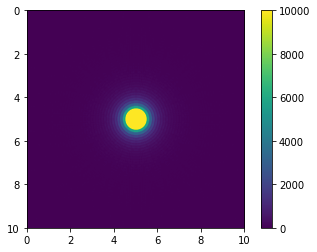

In [ ]:
plt.imshow(screen['I'],vmax=1e4,extent=(0,screen['D'],screen['D'],0))
plt.colorbar()

In [27]:
%%timeit
# Numpy
name = 'Numpy\nCPU'

screen = {}
screen['N'] = 8192
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, 1.0)
InCircle(screen, center, 2.0)
c2 = (center[0], center[1])
CircleAtten(screen,c2,0.1,1.3)
ScreenFFT(screen)
#t = %timeit -o ScreenFFT(screen)
#print(t)


#plt.imshow(screen['E'],extent=(0,screen['D'],screen['D'],0))
#plt.colorbar()

14.6 s ± 191 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
torch.floor

<function torch._VariableFunctionsClass.floor>

In [5]:
torch.int(4)

TypeError: ignored